<a href="https://colab.research.google.com/github/TosinSDGs/TosinSDGs/blob/main/Resume_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resume Screening and Classification for HR

### HR receives resumes in batches in the thousands. They need a machine learning model to automate the classification of the resumes so they can be submitted to the appropriate departments.

In [ ]:
import pandas as pd
import re


### Open and explore the data

In [ ]:
resumes = pd.read_csv('/content/sample_data/UpdatedResumeDataSet - UpdatedResumeDataSet (1).csv')
resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
resumes.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [ ]:
resumes.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
resumes.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [ ]:
text_0 = resumes.Resume[0]
len(text_0)

4746

In [ ]:
text_0[:250]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word '

### Clean the data, remove non-alphabet characters

In [ ]:
def cleanTxt(text):
    text = re.sub('https\S*', '', text) # remove links
    text = re.sub('[^A-Za-z]+', ' ', text).lower() # remove non-alpha chars
    return text

text_0 = cleanTxt(text_0)
text_0[:250]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analy'

In [ ]:
resumes['Resume'] = resumes['Resume'].apply(cleanTxt)
resumes.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may to may b e uit rgpv data...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...


### Sentiment Analysis / Word Cloud

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('wordnet')

text_dat = ' '.join(resumes['Resume'])
tokens = nltk.word_tokenize(text_dat)

WNL = nltk.WordNetLemmatizer()
stopwords = set(STOPWORDS)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Remove stop words and lemmatize

In [ ]:
text_dat_rd = [t for t in tokens if t not in stopwords]
text_dat_rd = [WNL.lemmatize(t) for t in text_dat_rd]
print(len(tokens), len(text_dat_rd))

397341 305778


Word Cloud

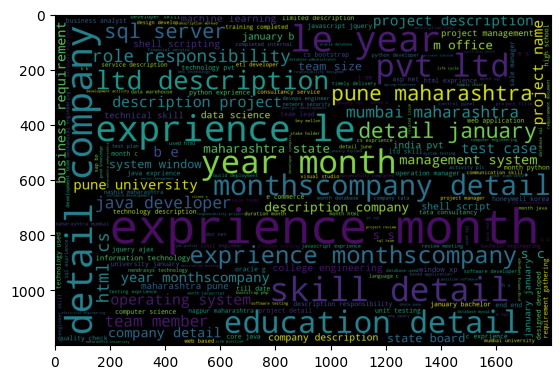

In [ ]:
word_cld = WordCloud(width=1800, height=1200).generate(' '.join(text_dat_rd))
plt.imshow(word_cld)

Bigram Word Cloud

In [ ]:
bigrams_list = list(nltk.bigrams(text_dat_rd))
bigrams = [' '.join(tup) for tup in bigrams_list]
bigrams[:10]

['skill programming',
 'programming language',
 'language python',
 'python panda',
 'panda numpy',
 'numpy scipy',
 'scipy scikit',
 'scikit learn',
 'learn matplotlib',
 'matplotlib sql']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(bigrams)
sum_words = bag_of_words.sum(axis=0)
bi_freq = [(wrd, sum_words[0, i]) for wrd, i in vectorizer.vocabulary_.items()]
bi_freq = sorted(bi_freq, key=lambda x: x[1], reverse=True)
bi_freq[:10]

[('exprience month', 2170),
 ('detail company', 1194),
 ('exprience le', 1137),
 ('le year', 1137),
 ('skill detail', 962),
 ('year month', 921),
 ('pvt ltd', 873),
 ('education detail', 820),
 ('monthscompany detail', 746),
 ('ltd description', 631)]

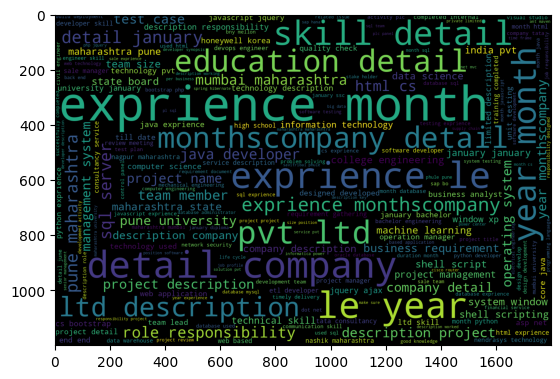

In [ ]:
bi_dict = dict(bi_freq)
wrd_cld_bi = WordCloud(width=1800, height=1200)
wrd_cld_bi.generate_from_frequencies(bi_dict)
plt.imshow(wrd_cld_bi)

### Vectorize the resume texts into TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer()
X = tf_vectorizer.fit_transform(resumes['Resume'])

In [ ]:
X.shape

(962, 7254)

In [ ]:
X_arr = X.toarray()
resumes_data = pd.DataFrame(X_arr)
resumes_data['target'] = resumes['Category']
resumes_data.shape

(962, 7255)

In [ ]:
resumes_data.iloc[:20,-20:]

,7235,7236,7237,7238,7239,7240,7241,7242,7243,7244,7245,7246,7247,7248,7249,7250,7251,7252,7253,target
0,0.0,0.0,0.0,0.072589,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.023923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Science


### Split the data and try a random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
train, test = train_test_split(resumes_data, test_size=0.2, stratify=resumes_data.target, random_state=42)
train_X, train_y = train.iloc[:,:-1], train.target
test_X, test_y = test.iloc[:,:-1], test.target
print(train_X.shape, test_X.shape)

(769, 7254) (193, 7254)


In [ ]:
rfcl = RandomForestClassifier()
rfcl.fit(train_X, train_y)
pred_test = rfcl.predict(test_X)
pred_train = rfcl.predict(train_X)


Classification Report on Test:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
                   Hadoop   

<Axes: >

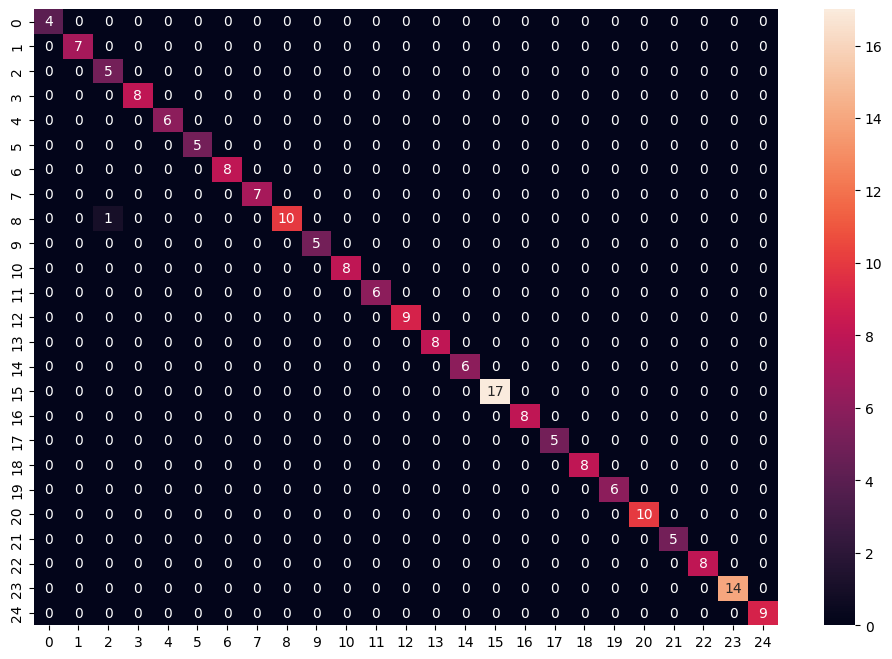

In [ ]:
print('\nClassification Report on Test:\n')
print(classification_report(test_y, pred_test))
print('Confusion Matrix on Test:\n')
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(test_y, pred_test), annot = True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Random Forest classifier performs remarkably well at predicting the category of job from resume text.


Classification Report on Test:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        16
                     Arts       1.00      1.00      1.00        29
       Automation Testing       1.00      1.00      1.00        21
               Blockchain       1.00      1.00      1.00        32
         Business Analyst       1.00      1.00      1.00        22
           Civil Engineer       1.00      1.00      1.00        19
             Data Science       1.00      1.00      1.00        32
                 Database       1.00      1.00      1.00        26
          DevOps Engineer       1.00      1.00      1.00        44
         DotNet Developer       1.00      1.00      1.00        23
            ETL Developer       1.00      1.00      1.00        32
   Electrical Engineering       1.00      1.00      1.00        24
                       HR       1.00      1.00      1.00        35
                   Hadoop   

<Axes: >

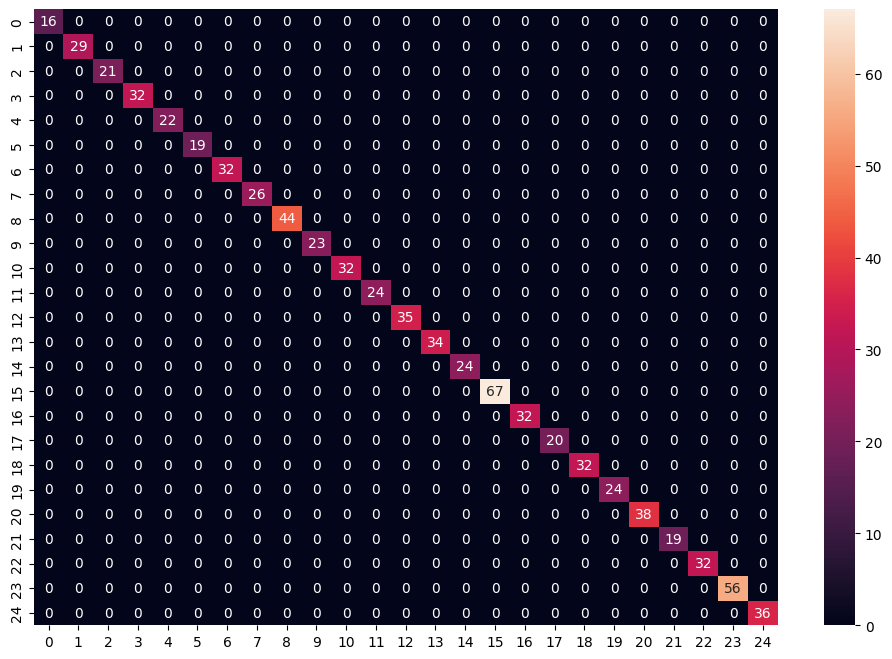

In [ ]:
print('\nClassification Report on Test:\n')
print(classification_report(train_y, pred_train))
print('Confusion Matrix on Test:\n')
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(train_y, pred_train), annot = True)